Source Data : https://www.kaggle.com/itsmesunil/bank-loan-modelling

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import category_encoders as ce

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score,roc_auc_score,plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

import pickle

In [41]:
bankloan= pd.read_csv('data.csv')
bankloan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,Undergrad,0,Yes,No,No,No,No
1,2,45,19,34,90089,3,1.5,Undergrad,0,Yes,No,No,No,No
2,3,39,15,11,94720,1,1.0,Undergrad,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Graduate,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Graduate,0,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Advanced/Professional,0,No,No,Yes,No,No
4996,4997,30,4,15,92037,4,0.4,Undergrad,85,No,No,Yes,No,No
4997,4998,63,39,24,93023,2,0.3,Advanced/Professional,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,Graduate,0,No,No,Yes,No,No


In [42]:
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   object 
 10  CD Account          5000 non-null   object 
 11  Online              5000 non-null   object 
 12  CreditCard          5000 non-null   object 
 13  Personal Loan       5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ KB


## EDA

In [43]:
bankloan['Personal Loan'].value_counts()

No     4520
Yes     480
Name: Personal Loan, dtype: int64

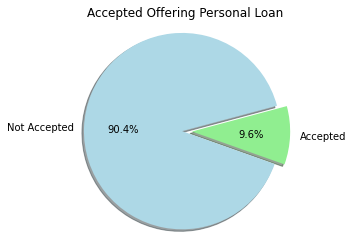

In [44]:
PL = [4520,480]

my_labels = ['Not Accepted','Accepted']
my_colors = ['lightblue','lightgreen']
my_explode = (0, 0.1)
plt.pie(PL, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Accepted Offering Personal Loan ')
plt.axis('equal')
plt.show()

Mostly customer refuse personal loan

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ID', ylabel='Density'>

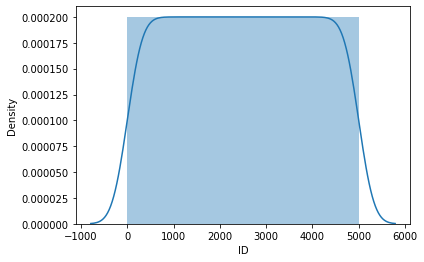

In [45]:
sns.distplot(bankloan['ID'])

ID uniform distribution, drop feature from model

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


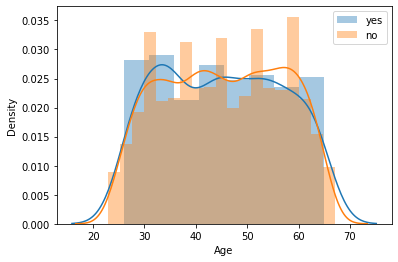

In [46]:
sns.distplot(bankloan[bankloan['Personal Loan']=='Yes']['Age'],label='yes')
sns.distplot(bankloan[bankloan['Personal Loan']=='No']['Age'],label='no')
plt.legend()

Age normal distribution,
Range customers age who accept personal loan between 25 - 65 years old 

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


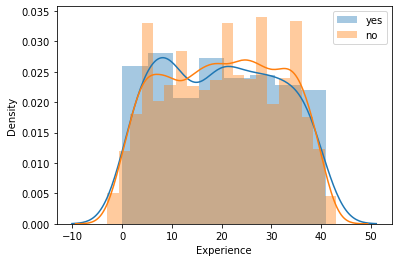

In [47]:
sns.distplot(bankloan[bankloan['Personal Loan']=='Yes']['Experience'],label='yes')
sns.distplot(bankloan[bankloan['Personal Loan']=='No']['Experience'],label='no')
plt.legend()

Experience normal distribution, Range Experience who accept personal loan between 0 - 40

Text(0.5, 1.0, 'Income vs Average Use of Credit Card for Accept Personal Loan')

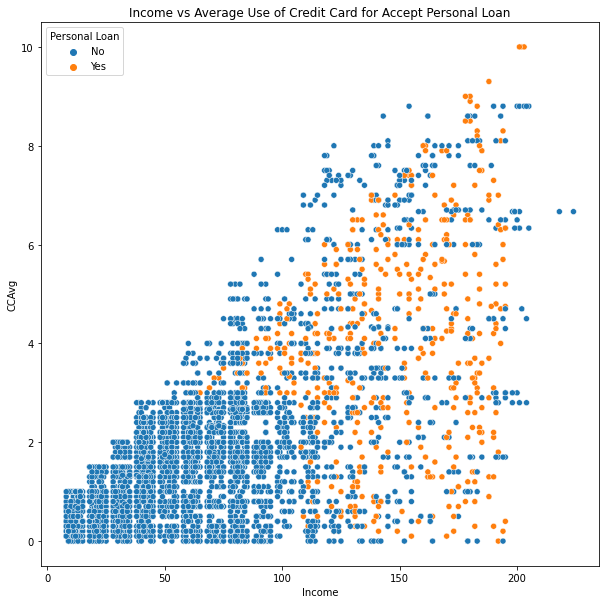

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Income',y='CCAvg', data=bankloan, hue='Personal Loan')
plt.title('Income vs Average Use of Credit Card for Accept Personal Loan')

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


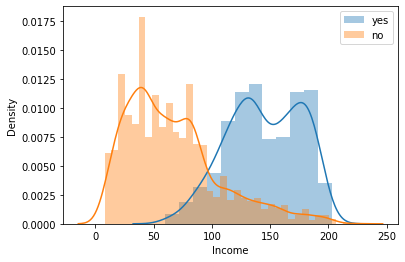

In [49]:
sns.distplot(bankloan[bankloan['Personal Loan']=='Yes']['Income'],label='yes')
sns.distplot(bankloan[bankloan['Personal Loan']=='No']['Income'],label='no')
plt.legend()

Customers who accept personal loan have income start to $ 50 thousand 

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


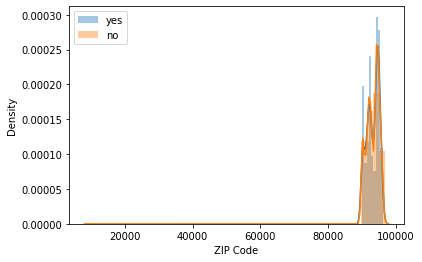

In [50]:
sns.distplot(bankloan[bankloan['Personal Loan']=='Yes']['ZIP Code'],label='yes')
sns.distplot(bankloan[bankloan['Personal Loan']=='No']['ZIP Code'],label='no')
plt.legend()

ZIP Code is left skewed, possible to drop >> Check correlation

<AxesSubplot:xlabel='Family', ylabel='count'>

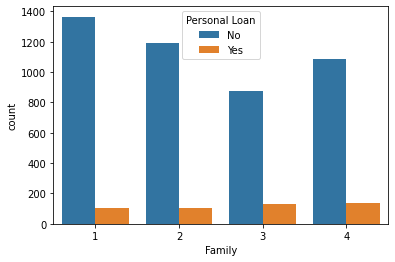

In [51]:
sns.countplot(x='Family',data=bankloan,hue='Personal Loan')

Family size 1, mostly reject personal loan, and 4 family size mostly accept personal loan

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


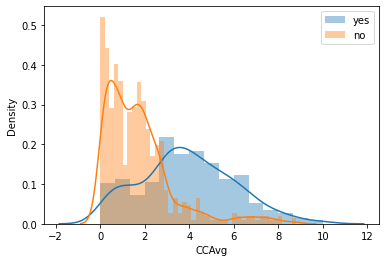

In [52]:
sns.distplot(bankloan[bankloan['Personal Loan']=='Yes']['CCAvg'],label='yes')
sns.distplot(bankloan[bankloan['Personal Loan']=='No']['CCAvg'],label='no')
plt.legend()

Credit Card with average 0 - 5 having more probability to reject offering personal loan  

Text(0.5, 1.0, 'Accepted Personal Loan By Education')

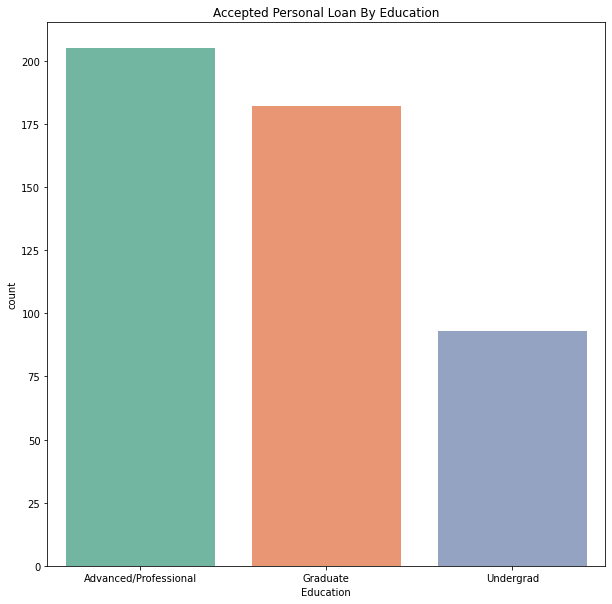

In [53]:
plt.figure(figsize=(10,10))
sns.countplot(x='Education',data=bankloan[bankloan['Personal Loan']=='Yes'],palette='Set2')
plt.title('Accepted Personal Loan By Education')

<AxesSubplot:xlabel='Education', ylabel='count'>

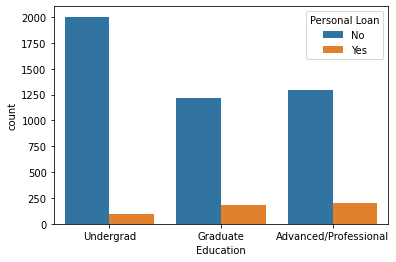

In [54]:
sns.countplot(x='Education',data=bankloan,hue='Personal Loan')

Undergrad education mostly refuse personal loan

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


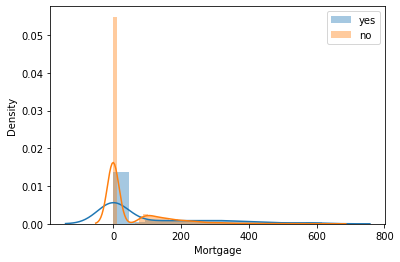

In [55]:
sns.distplot(bankloan[bankloan['Personal Loan']=='Yes']['Mortgage'],label='yes')
sns.distplot(bankloan[bankloan['Personal Loan']=='No']['Mortgage'],label='no')
plt.legend()

Majority customer doesn't have mortgage

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

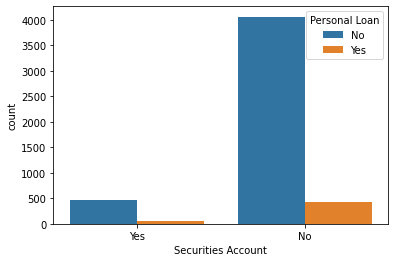

In [56]:
sns.countplot(x='Securities Account',data=bankloan,hue='Personal Loan')

Customer who dont have securities account mostly refuse personal loan

<AxesSubplot:xlabel='CD Account', ylabel='count'>

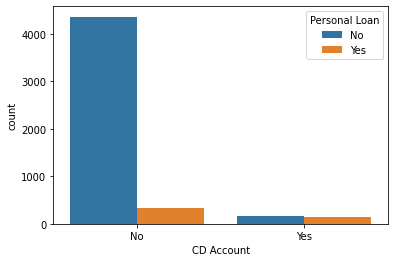

In [57]:
sns.countplot(x='CD Account',data=bankloan,hue='Personal Loan')

Mostly customer doesn't have CD Account

Text(0.5, 1.0, 'Accepted Personal Loan with Having Mobile Banking')

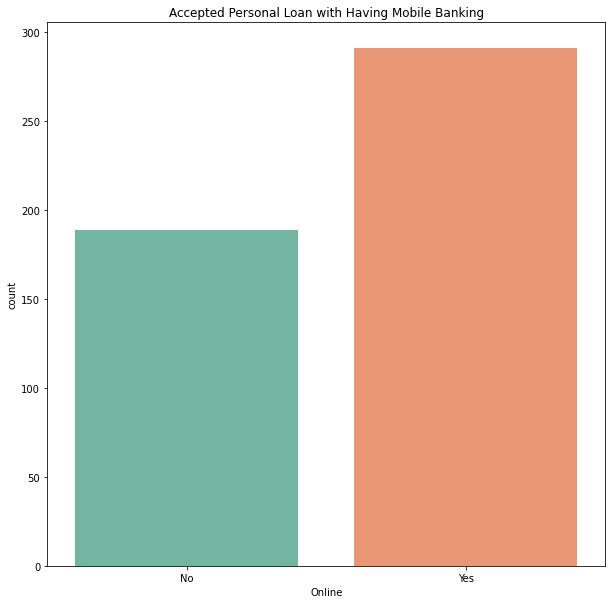

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(x='Online',data=bankloan[bankloan['Personal Loan']=='Yes'],palette='Set2')
plt.title('Accepted Personal Loan with Having Mobile Banking')

<AxesSubplot:xlabel='Online', ylabel='count'>

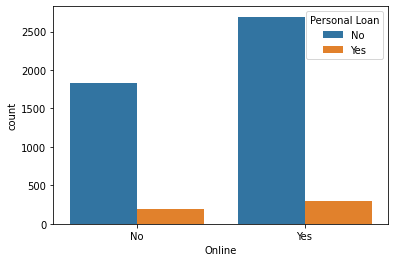

In [59]:
sns.countplot(x='Online',data=bankloan,hue='Personal Loan')

Mostly customer have mobile banking and have high probability to accept personal loan

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

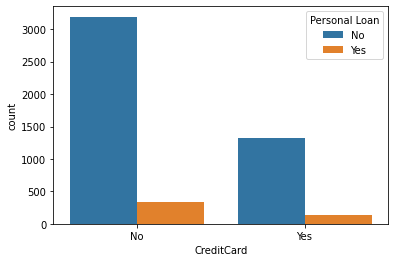

In [60]:
sns.countplot(x='CreditCard',data=bankloan,hue='Personal Loan')

Mostly customer doesn't have credit card, and have high probability to accept personal loan

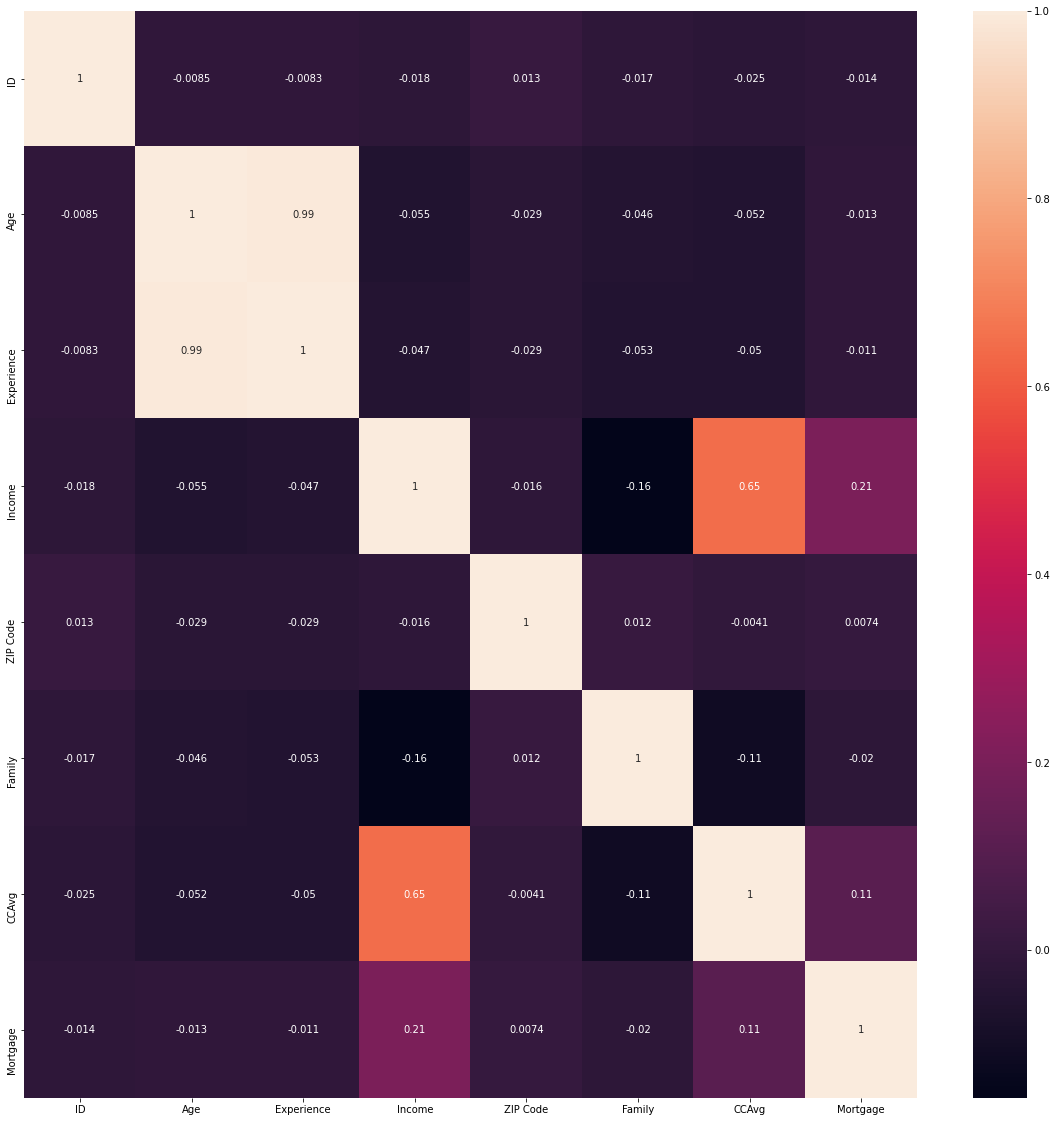

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(bankloan[bankloan.corr().index].corr(),annot=True)
plt.show()

Having correlation between 2 features > 0.1 :
- Age
- Experience
- Income
- Family
- CCAvg
- Mortgage

Data categorical (try to put into model & find feature importance)
- Education 
- Securities Account
- CD Account
- Online
- CreditCard

I decided to choose this feature and drop ID, ZIP Code and Experience


## Preprocessing


- one hot encoding : Securities Account, CD Account, Online, CreditCard, Family, Education
- Ordinal encoding : Education
- no treatment : Age, Income, CCAvg, Mortgage, Family

One hot encoding is used, because there are available to nominal encoding and have small category(Securities Account, CD Account, Online, CreditCard)

In [62]:
ordinal_mapping=[{'col':'Education','mapping':{None:0,'Undergrad':1,'Graduate':2, 'Advanced/Professional':3}}]

In [63]:
ordinal_encoder=ce.OrdinalEncoder(mapping=ordinal_mapping)
bankloan_ord=ordinal_encoder.fit_transform(bankloan['Education'])
bankloan_ord

,Education
0,1
1,1
2,1
3,2
4,2
...,...
4995,3
4996,1
4997,3
4998,2


In [64]:
transformer= ColumnTransformer([('one_hot',OneHotEncoder(drop='first'),['Securities Account', 'CD Account', 'Online', 'CreditCard']),
('binary',ce.BinaryEncoder(),['Education'])
], remainder='passthrough')

In [115]:
fitur=['Age','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']
X=bankloan[fitur]
y=[1 if i=='Yes' else 0 for i in bankloan['Personal Loan']]


In [116]:
bankloan['Personal Loan'].value_counts()

No     4520
Yes     480
Name: Personal Loan, dtype: int64

Have imbalance dataset

In [117]:
X_train, X_test, y_train, y_test= train_test_split(X,y,
    test_size=.2,
    stratify=y,
    random_state=2020)

To avoid both, predicting refuse personal loan but in actual accept personal loan and predicting accept personal loan but in actual refuse personal loan , we use f1 score (minimize FN & FP),because we want to increase personal loan customer with minimize marketing budget

### Cek Features Importance

In [118]:
X_train_preprocessed=transformer.fit_transform(X_train)
X_test_preprocessed=transformer.transform(X_test)

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [119]:
X_train_preprocessed=pd.DataFrame(X_train_preprocessed)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed)

In [120]:
transformer.transformers_

[('one_hot',
  OneHotEncoder(drop='first'),
  ['Securities Account', 'CD Account', 'Online', 'CreditCard']),
 ('binary', BinaryEncoder(), ['Education']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 5])]

In [121]:
features= list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names()+ ['Age','Income','CCAvg','Mortgage','Family']

In [122]:
features

['x0_Yes',
 'x1_Yes',
 'x2_Yes',
 'x3_Yes',
 'Education_0',
 'Education_1',
 'Education_2',
 'Age',
 'Income',
 'CCAvg',
 'Mortgage',
 'Family']

In [123]:
modell=DecisionTreeRegressor(max_depth=3)
modell.fit(X_train_preprocessed,y_train)

DecisionTreeRegressor(max_depth=3)

In [124]:
y_pred=modell.predict(X_test_preprocessed)
print('mse:', mean_squared_error(y_test,y_pred))

mse: 0.012706999676560844


In [125]:
importance_table=pd.DataFrame({
    'imp':modell.feature_importances_
}, index=features)

In [126]:
importance_table

,imp
x0_Yes,0.000000
x1_Yes,0.018048
x2_Yes,0.000000
x3_Yes,0.000000
Education_0,0.000000
Education_1,0.378121
Education_2,0.000000
Age,0.000000
Income,0.431187
CCAvg,0.149147


<AxesSubplot:>

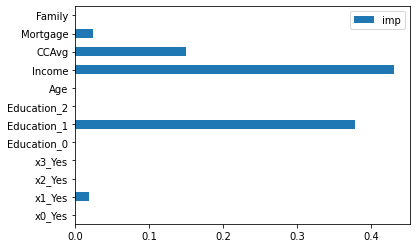

In [127]:
importance_table.plot(kind='barh')

Feature Mortgage, CCAvg, Income, Education & CD Account have importance values

In [128]:
def evaluate(bankloan,model):

    model_name=[]
    f1_score=[]
    f1_std=[]
    for name, model in model:
        model = model
        estimator = Pipeline([
            ('preprocess', transformer),
            ('model', model)])

        skfold=StratifiedKFold(n_splits=5)
        score= cross_val_score(estimator,X_train,y_train,scoring='f1',cv=skfold).mean()
        std= cross_val_score(estimator,X_train,y_train,scoring='f1',cv=skfold).std()
        f1_score.append(score)
        f1_std.append(std)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'f1_score':f1_score, 'f1_std':f1_std})

In [129]:
models = [
    ['Log Regression', LogisticRegression(solver='liblinear')],
    ['DecisionTree', DecisionTreeClassifier()],
    ['RandomForest', RandomForestClassifier()],
    ['KNeighbours', KNeighborsClassifier()]]

In [130]:
evaluate(bankloan,models)

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use

,Name,f1_score,f1_std
0,Log Regression,0.724627,0.033429
1,DecisionTree,0.902840,0.018909
2,RandomForest,0.926647,0.022779
3,KNeighbours,0.433392,0.043322


Choose RandomForest Classifier because it has high f1 score but f1 std less than log reg & KNeighbours

In [131]:
model=RandomForestClassifier()

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model)])

estimator.fit(X_train,y_train)
f1_score(y_test,estimator.predict(X_test))

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.9565217391304348

In [132]:
print(classification_report(y_test,estimator.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       1.00      0.92      0.96        96

    accuracy                           0.99      1000
   macro avg       1.00      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000



<AxesSubplot:>

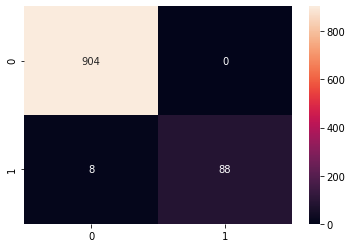

In [133]:
sns.heatmap(confusion_matrix(y_test,estimator.predict(X_test)),annot=True, fmt='g')

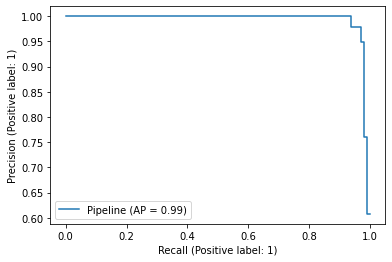

In [134]:
plot_precision_recall_curve(estimator,X_test,y_test)

Perfect Classifier, because AP close to 1

## Resampling & Tunning

In [135]:
model=RandomForestClassifier()
under=NearMiss()
over=SMOTE()

estimator = Pipeline([
    ('preprocess', transformer), ('balance', under),
    ('model', model)])

skfold=StratifiedKFold(n_splits=5)

In [136]:
hyperparam_space={'balance':[over,under]}

In [137]:
grid_search= GridSearchCV(estimator,
    param_grid= hyperparam_space,
    cv=skfold,
    n_jobs=-1,
    scoring='f1')

In [138]:
grid_search.fit(X_train,y_train)

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Securities '
                                                                          'Account',
                                                                          'CD '
                                                                          'Account',
                                                                          'Online',
                                                                          'CreditCard']),
                                                                        ('binary',
   

In [139]:
grid_search.best_score_

0.9196891846625931

In [140]:
grid_search.best_estimator_.fit(X_train,y_train)
f1_score(y_test,grid_search.best_estimator_.predict(X_test))

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.9735449735449735

In [141]:
print(classification_report(y_test,grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.99      0.96      0.97        96

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.99      1000
weighted avg       0.99      0.99      0.99      1000



<AxesSubplot:>

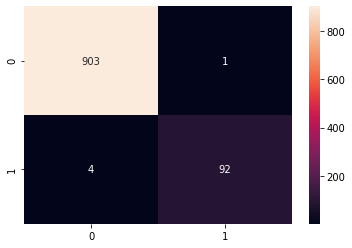

In [142]:
sns.heatmap(confusion_matrix(y_test,grid_search.best_estimator_.predict(X_test)),annot=True, fmt='g')

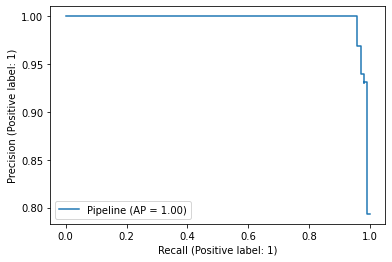

In [143]:
plot_precision_recall_curve(grid_search.best_estimator_,X_test,y_test)

In [144]:
hyperparam_space = {
        'balance__n_neighbors': [2, 5, 10, 15],
        'model__min_samples_leaf' : [1,5],
        'model__min_samples_split' : [2,5],
        'model__max_depth' : [2,3,4,6,8],
        'model__criterion' : ['entropy','gini']}

In [145]:
estimator = Pipeline([
    ('preprocess', transformer), ('balance', under),
    ('model', model)])
skfold= StratifiedKFold(n_splits=5)

grid= GridSearchCV(estimator,param_grid=hyperparam_space,cv=skfold,scoring='f1',n_jobs=-1)
grid.fit(X_train,y_train)

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Securities '
                                                                          'Account',
                                                                          'CD '
                                                                          'Account',
                                                                          'Online',
                                                                          'CreditCard']),
                                                                        ('binary',
   

In [146]:
grid.best_params_

{'balance__n_neighbors': 5,
 'model__criterion': 'gini',
 'model__max_depth': 8,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 2}

In [147]:
grid.best_score_

0.3866276950903155

In [148]:
grid.best_estimator_.fit(X_train,y_train)
f1_score(y_test,grid.best_estimator_.predict(X_test))

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.39400428265524623

In [149]:
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.69      0.82       904
           1       0.25      0.96      0.39        96

    accuracy                           0.72      1000
   macro avg       0.62      0.82      0.60      1000
weighted avg       0.92      0.72      0.77      1000



<AxesSubplot:>

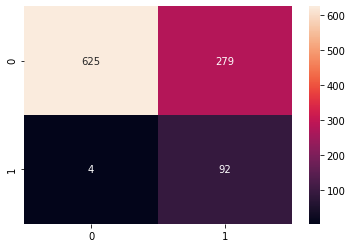

In [150]:
sns.heatmap(confusion_matrix(y_test,grid.best_estimator_.predict(X_test)),annot=True, fmt='g')

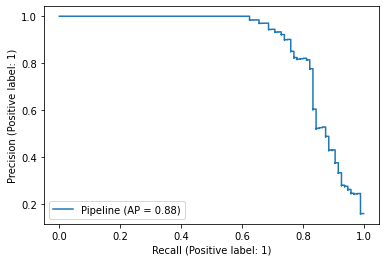

In [151]:
plot_precision_recall_curve(grid.best_estimator_,X_test,y_test)

Before vs After Tunning

In [152]:
grid_search.fit(X_train,y_train)
f1_score(y_test,grid_search.best_estimator_.predict(X_test))

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.9633507853403142

In [153]:
print(classification_report(y_test,grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.97      0.96      0.96        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [154]:
grid.fit(X_train,y_train)
f1_score(y_test,grid.best_estimator_.predict(X_test))

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.40350877192982454

In [155]:
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       904
           1       0.26      0.96      0.40        96

    accuracy                           0.73      1000
   macro avg       0.62      0.83      0.61      1000
weighted avg       0.92      0.73      0.78      1000



The best choice model is RandomForestClassifier with f1 score, no need to tunning, because accuracy score after tunning lower than before tunning, and also use resampling because count of AP Score resampling higher than without resampling

In [156]:
grid_search.best_estimator_.fit(X_train,y_train)
y_predict=grid_search.best_estimator_.predict(X_test)
f1_score(y_test,y_predict)

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.9574468085106383

## Saving Model

In [157]:
grid_search.best_estimator_.fit(X,y)
file_name='Model_Final.sav'

pickle.dump(grid_search.best_estimator_,open(file_name,'wb'))

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


### Predict with saved model

In [158]:
loaded_model= pickle.load(open(file_name,'rb'))

In [159]:
loaded_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [160]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   object 
 5   Mortgage            5000 non-null   int64  
 6   Securities Account  5000 non-null   object 
 7   CD Account          5000 non-null   object 
 8   Online              5000 non-null   object 
 9   CreditCard          5000 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


In [161]:
bankloan_predict= pd.DataFrame({
    'Age':[30],
    'Income':[100],
    'Family':[1],
    'CCAvg':[1.60],
    'Education':['Advanced/Professional'],
    'Mortgage':[0],
    'Securities Account':['Yes'],
    'CD Account' : ['No'],
    'Online':['No'],
    'CreditCard':['No']
})

In [162]:
bankloan_predict

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,30,100,1,1.6,Advanced/Professional,0,Yes,No,No,No


In [163]:
loaded_model.predict(bankloan_predict)

array([0])

In [164]:
loaded_model.predict_proba(bankloan_predict)[0][1]

0.21